In [26]:
import pymetheus
from pymetheus.pymetheus import LogicNet
import numpy as np
ll = LogicNet()

In [27]:
print(pymetheus.__version__)
ll.constant('John', definition=np.random.normal(0,.1,size=2))
ll.constant('Jim', definition=np.random.normal(0,.1,size=2))
ll.constant('Jack', definition=np.random.normal(0,.1,size=2))
ll.constant('Mary', definition=np.random.normal(1,.1,size=2))
ll.constant('Meggy', definition=np.random.normal(1,.1,size=2))
ll.constant('Mina', definition=np.random.normal(1,.1,size=2))

0.1.0


In [28]:
ll.constant('Person1', definition=np.random.normal(0.5,.1,size=2), optimize=True)
ll.constant('Person2', definition=np.random.normal(0.5,.1,size=2), optimize=True)

In [29]:
for a,b in ll.constants.items():
    print(a,b)
values_of_constants = np.array([b.cpu().detach().numpy() for a,b in ll.constants.items()])
print(values_of_constants)
print(values_of_constants[:3,0])

John tensor([ 0.0014, -0.0025])
Jim tensor([-0.0820,  0.0313])
Jack tensor([ 0.0115, -0.0861])
Mary tensor([1.0098, 1.0449])
Meggy tensor([0.9280, 0.9954])
Mina tensor([0.9426, 0.8626])
Person1 tensor([0.5421, 0.3958], requires_grad=True)
Person2 tensor([0.5685, 0.4390], requires_grad=True)
[[ 0.00136382 -0.00246866]
 [-0.08195998  0.03129887]
 [ 0.0114631  -0.08605138]
 [ 1.0097874   1.0448844 ]
 [ 0.928031    0.9954015 ]
 [ 0.94255203  0.86263806]
 [ 0.54205734  0.39575934]
 [ 0.56845635  0.43896714]]
[ 0.00136382 -0.08195998  0.0114631 ]


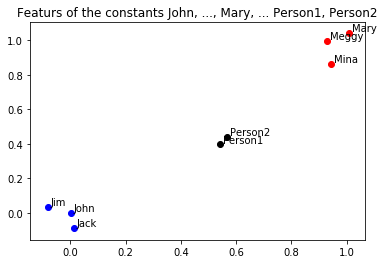

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().cpu().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')

plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().cpu().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


In [31]:
ll.predicate('Male', arity=1, argument_size = 2) # A is a unary predicate on objects with 2 features
ll.predicate('Female', arity=1, argument_size = 2) # B is a unary predicato on objects with 2 features
ll.predicate('CanPlayWith', arity=2, argument_size = 2) # R is a binary relation on objects with 2 features 

In [32]:
print(ll.reason('Male(John)'))
print(ll.reason('Female(John)'))
print(ll.reason('Male(Jack)'))
print(ll.reason('Female(Mary)'))
print(ll.reason('CanPlayWith(John,Mary)'))

0.47112963
0.4249513
0.46888733
0.5866519
0.5013789


In [33]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])
men

array([[0.47112963],
       [0.47525075],
       [0.46888733],
       [0.5054841 ],
       [0.5005226 ],
       [0.5049931 ],
       [0.4748423 ],
       [0.47603604]], dtype=float32)

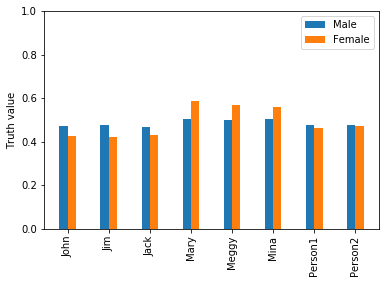

In [34]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

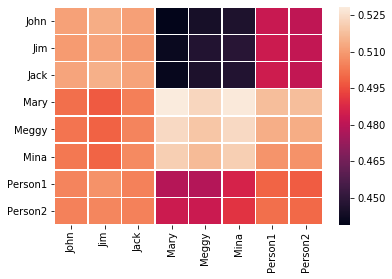

In [35]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [36]:
ll.knowledge("Male(John)")
ll.knowledge("Male(Jack)")
ll.knowledge('~Male(Mary)')
ll.knowledge('~Male(Meggy)')
ll.knowledge('Female(Mary)')
ll.knowledge('Female(Meggy)')
ll.knowledge('~Female(John)')
ll.knowledge('~Female(Jack)')
ll.knowledge('CanPlayWith(John,Mary)')
ll.knowledge('CanPlayWith(Meggy,Jack)')
ll.knowledge('~CanPlayWith(Meggy,Mary)')
ll.knowledge('~CanPlayWith(Jim,Jack)')
ll.knowledge('CanPlayWith(Person1,Jim)')
ll.knowledge('CanPlayWith(Person2,Mina)')

In [37]:
ll.reason("CanPlayWith(Person2,Mary)")

0.51776147

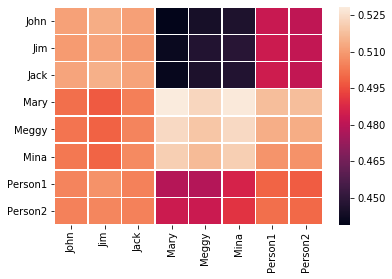

In [38]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [39]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

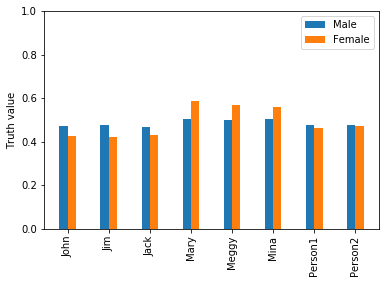

In [40]:
fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

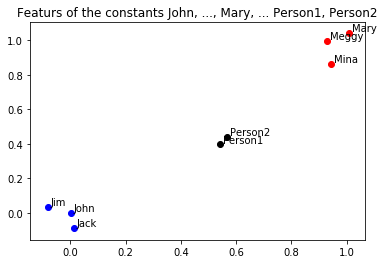

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


In [42]:
domain_of_variables = np.random.uniform(0,1,size=(100,2))
ll.variable('?x', domain_of_variables, labelled=False)
ll.variable('?y', domain_of_variables, labelled=False)


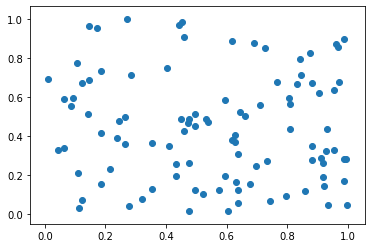

In [43]:
plt.scatter(domain_of_variables[:,0],domain_of_variables[:,1])
plt.show()

In [44]:
ll.universal_rule('forall ?x,?y: CanPlayWith(?x,?y) -> ((Male(?x) & Female(?y)) | (Female(?x) & Male(?y)))')

ll.universal_rule('forall ?x,?y: ((Male(?x) & Female(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: ((Female(?x) & Male(?y)) -> CanPlayWith(?x,?y))')
ll.universal_rule('forall ?x,?y: (CanPlayWith(?x,?y) -> CanPlayWith(?y,?x))')
ll.universal_rule('forall ?x: (Male(?x) % ~Female(?x))')




In [45]:
ll.reason('forall ?x,?y: CanPlayWith(?x,?y) -> ((Male(?x) & Female(?y)) | (Female(?x) & Male(?y)))')

array(1., dtype=float32)

In [46]:
ll.fit(epochs=1000, grouping=1000)



  0%|          | 0/1000 [00:00<?, ?it/s]

Current Satisfiability 0.809376):   0%|          | 0/1000 [00:01<?, ?it/s]

Current Satisfiability 0.809376):   0%|          | 1/1000 [00:01<20:19,  1.22s/it]

Current Satisfiability 0.815346):   0%|          | 1/1000 [00:02<20:19,  1.22s/it]

Current Satisfiability 0.815346):   0%|          | 2/1000 [00:02<20:05,  1.21s/it]

Current Satisfiability 0.821105):   0%|          | 2/1000 [00:03<20:05,  1.21s/it]

Current Satisfiability 0.821105):   0%|          | 3/1000 [00:03<20:08,  1.21s/it]

Current Satisfiability 0.826120):   0%|          | 3/1000 [00:04<20:08,  1.21s/it]

Current Satisfiability 0.826120):   0%|          | 4/1000 [00:04<20:18,  1.22s/it]

Current Satisfiability 0.830527):   0%|          | 4/1000 [00:06<20:18,  1.22s/it]

Current Satisfiability 0.830527):   0%|          | 5/1000 [00:06<20:08,  1.21s/it]

Current Satisfiability 0.834634):   0%|          | 5/1000 [00:07<20:08,  1.21s/it]

Current Satisfiability 0.834634):   1%| 

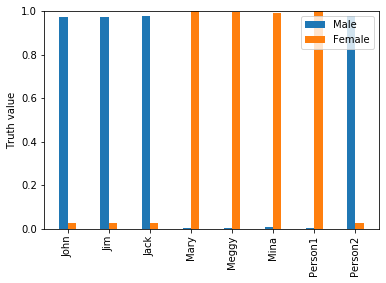

In [47]:
import numpy as np
men = np.array([np.array([ll.reason('Male({})'.format(a))]) for a, b in ll.constants.items()])
women = np.array([np.array([ll.reason('Female({})'.format(a))]) for a, b in ll.constants.items()])

fig, ax = plt.subplots()
ax.bar(np.arange(len(ll.constants))-.1,men[:,0],width=.2,label="Male")
ax.bar(np.arange(len(ll.constants))+.1,women[:,0],width=.2,label="Female")
ax.set_xticks(np.arange(len(ll.constants)))
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
ax.set_ylabel("Truth value")
ax.set_ylim(0,1)
ax.legend()
plt.show()

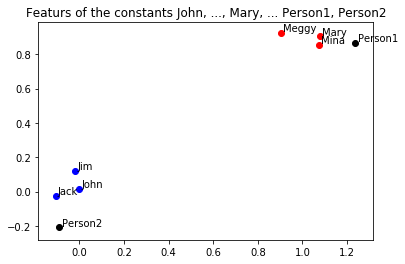

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
values_of_constants = np.array([b.detach().numpy() for a,b in ll.constants.items()])
plt.scatter(values_of_constants[:3,0],values_of_constants[:3,1],c='b')
plt.scatter(values_of_constants[3:6,0],values_of_constants[3:6,1],c='r')
plt.scatter(values_of_constants[6:,0],values_of_constants[6:,1],c='k')

for a,b in ll.constants.items():
    plt.annotate(a,b.detach().numpy()+.01)
plt.title("Featurs of the constants John, ..., Mary, ... Person1, Person2")
plt.show()


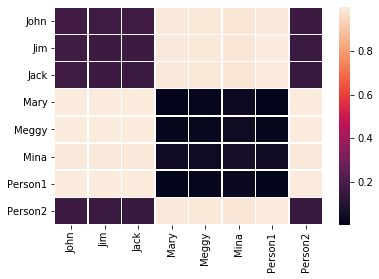

In [48]:
play = np.array([[ll.reason('CanPlayWith({},{})'.format(c,d)) 
                  for c in ll.constants.keys()] for d in ll.constants.keys()])
import seaborn as sns
plt.clf()
ax = sns.heatmap(play, linewidth=0.5)
ax.set_yticklabels(ll.constants.keys(),rotation='horizontal')
ax.set_xticklabels(ll.constants.keys(),rotation='vertical')
plt.show()

In [ ]:
ll.reason("CanPlayWith(Person2,Person2)")

In [ ]:
import torch

ll.function('opponent',2,2) 

class equal_simple(torch.nn.Module):

    def __init__(self):
        super(equal_simple, self).__init__()
        self.system = False

    def forward(self, x, y):
        delta = torch.nn.PairwiseDistance()(x,y)
        similarity = torch.exp(-delta).reshape(-1,1)
        return similarity

In [ ]:
ll.predicate("equal", network=equal_simple())


In [ ]:
ll.universal_rule('forall ?x:CanPlayWith(?x,opponent(?x))')
ll.universal_rule('forall ?x:(Male(?x) % Female(opponent(?x)))')
ll.universal_rule('forall ?x:(Female(?x) % Male(opponent(?x)))')

ll.universal_rule('forall ?x,?y: equal(opponent(?x),?y) -> equal(opponent(?y),?x)')

ll.knowledge('equal(opponent(John),Mary)')
ll.knowledge('equal(opponent(Mina),Jack)')
ll.knowledge('equal(opponent(Meggy),Person2)')

In [ ]:
ll.learn(epochs=1000, batch_size=1000)